In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import networkx as nx
import statistics

In [2]:
riot_philadelphia_superbowl_df = pd.read_csv('/home/cquirk/EventCSVs/riot_philadelphia_superbowl.csv')

In [3]:
hurricane_harvey_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_harvey_df.csv')
hurricane_irma_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_irma_df.csv')
earthquake_mexico_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_mexico_df.csv')
hurricane_maria_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_maria_df.csv')
earthquake_costarica_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_costarica_df.csv')
earthquake_iran_iraq_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_iran_iraq_df.csv')
mudslide_california_df = pd.read_csv('/home/cquirk/EventCSVs/mudslide_california_df.csv')
windstorm_friederike_df = pd.read_csv('/home/cquirk/EventCSVs/windstorm_friederike_df.csv')
wildfire_nairobi_df = pd.read_csv('/home/cquirk/EventCSVs/wildfire_nairobi_df.csv')

riot_hamburg_G20_df = pd.read_csv('/home/cquirk/EventCSVs/riot_hamburg_G20_df.csv')
riot_charlottesville_df = pd.read_csv('/home/cquirk/EventCSVs/riot_charlottesville_df.csv')
riot_catalonia_df = pd.read_csv('/home/cquirk/EventCSVs/riot_catalonia_df.csv')
riot_philadelphia_superbowl_df = pd.read_csv('/home/cquirk/EventCSVs/riot_philadelphia_superbowl.csv')

school_shooting_tehama_county_df = pd.read_csv('/home/cquirk/EventCSVs/school_shooting_tehama_county_df.csv')
shooting_trebes_france_df = pd.read_csv('/home/cquirk/EventCSVs/shooting_trebes_france_df.csv')
shooting_youtube_HQ_df = pd.read_csv('/home/cquirk/EventCSVs/shooting_youtube_HQ_df.csv')
van_attack_muenster_df = pd.read_csv('/home/cquirk/EventCSVs/van_attack_muenster_df.csv')
school_shooting_santa_fe_df = pd.read_csv('/home/cquirk/EventCSVs/school_shooting_santa_fe_df.csv')

In [11]:
df_high_arousal_philly = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Anger') | (riot_philadelphia_superbowl_df['Emotion'] == 'Anticipation') | (riot_philadelphia_superbowl_df['Emotion'] == 'Fear') | (riot_philadelphia_superbowl_df['Emotion'] == 'Surprise')]
df_low_arousal_philly = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Sadness') | (riot_philadelphia_superbowl_df['Emotion'] == 'Trust') | (riot_philadelphia_superbowl_df['Emotion'] == 'Joy') | (riot_philadelphia_superbowl_df['Emotion'] == 'Disgust') | (riot_philadelphia_superbowl_df['Emotion'] == 'neutral')]


df_high_misery_philly = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Anger') | (riot_philadelphia_superbowl_df['Emotion'] == 'Fear') | (riot_philadelphia_superbowl_df['Emotion'] == 'Sadness') | (riot_philadelphia_superbowl_df['Emotion'] == 'Disgust')]
df_low_misery_philly = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Trust') | (riot_philadelphia_superbowl_df['Emotion'] == 'Joy') | (riot_philadelphia_superbowl_df['Emotion'] == 'Anticipation') | (riot_philadelphia_superbowl_df['Emotion'] == 'Surprise') | (riot_philadelphia_superbowl_df['Emotion'] == 'neutral')]

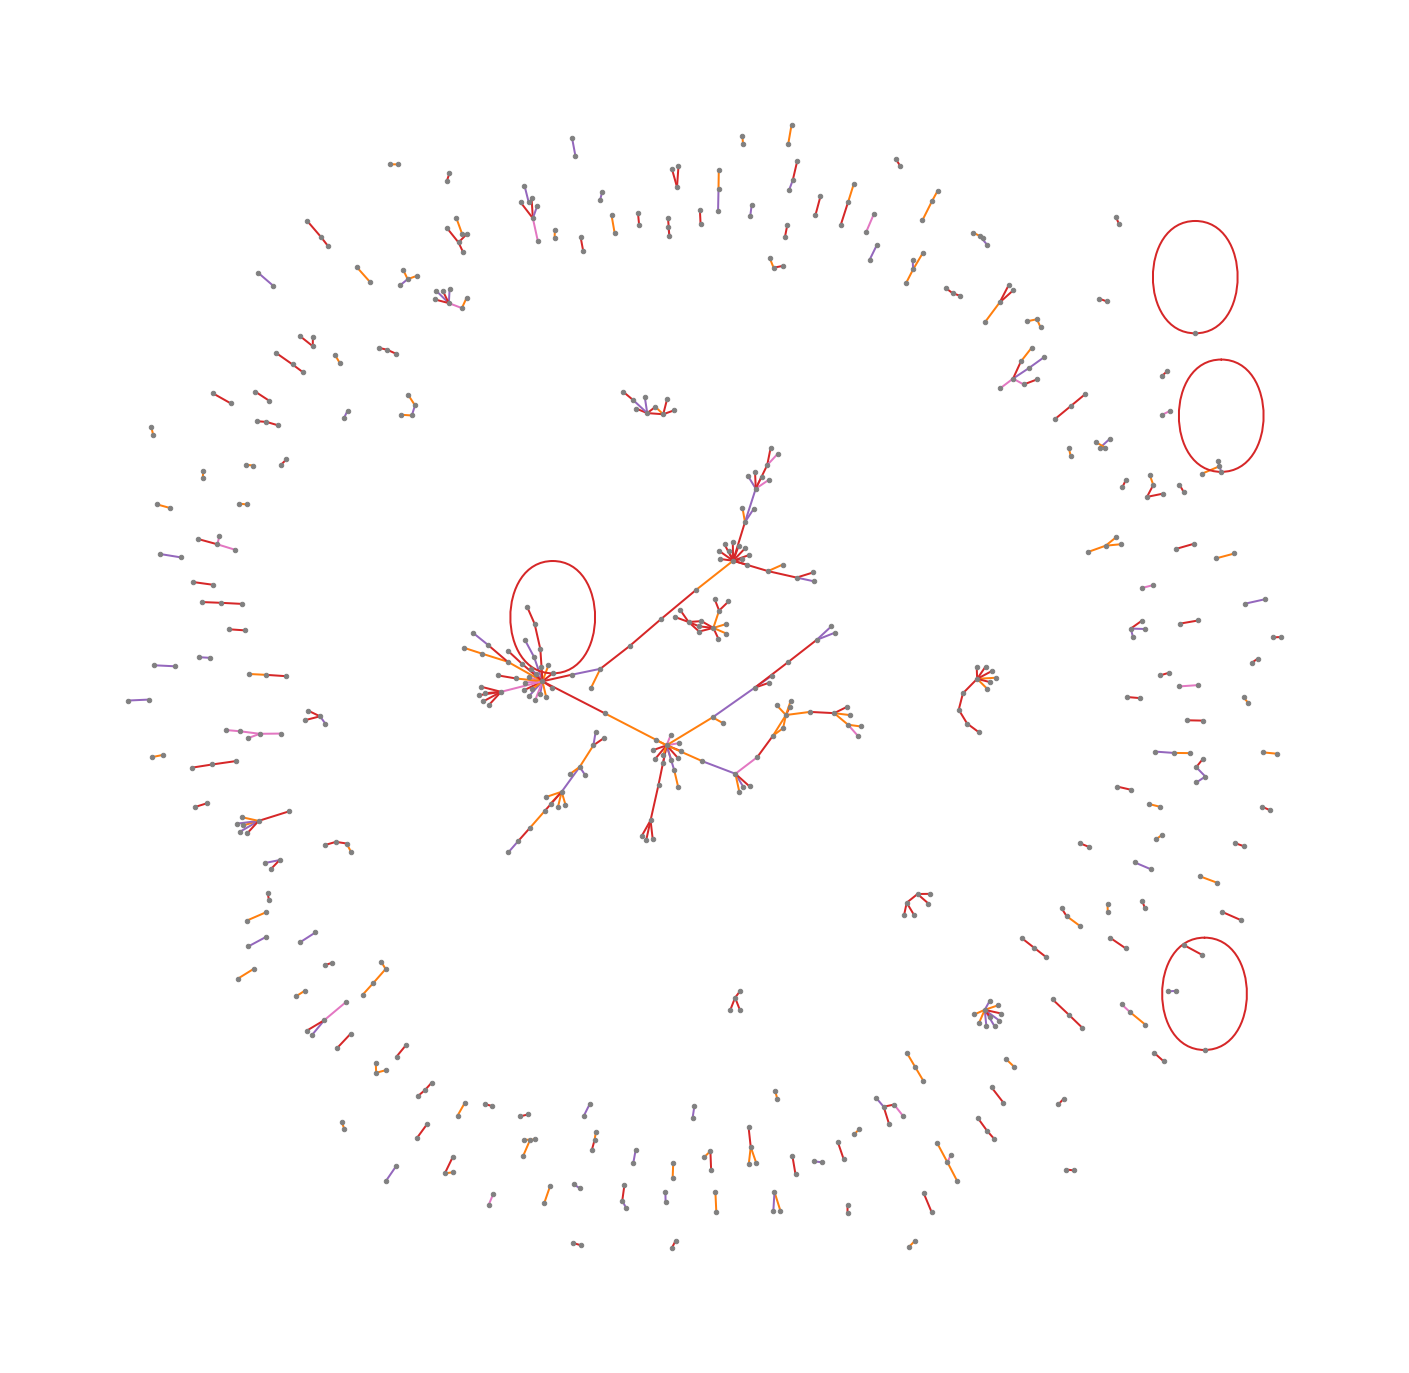

In [12]:
fig, ax = plt.subplots(figsize=(25,25))

G_ha_philly = nx.from_pandas_edgelist(df_high_arousal_philly, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_ha_philly, seed=7)
nx.draw(G_ha_philly, pos, edge_color=df_high_arousal_philly['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

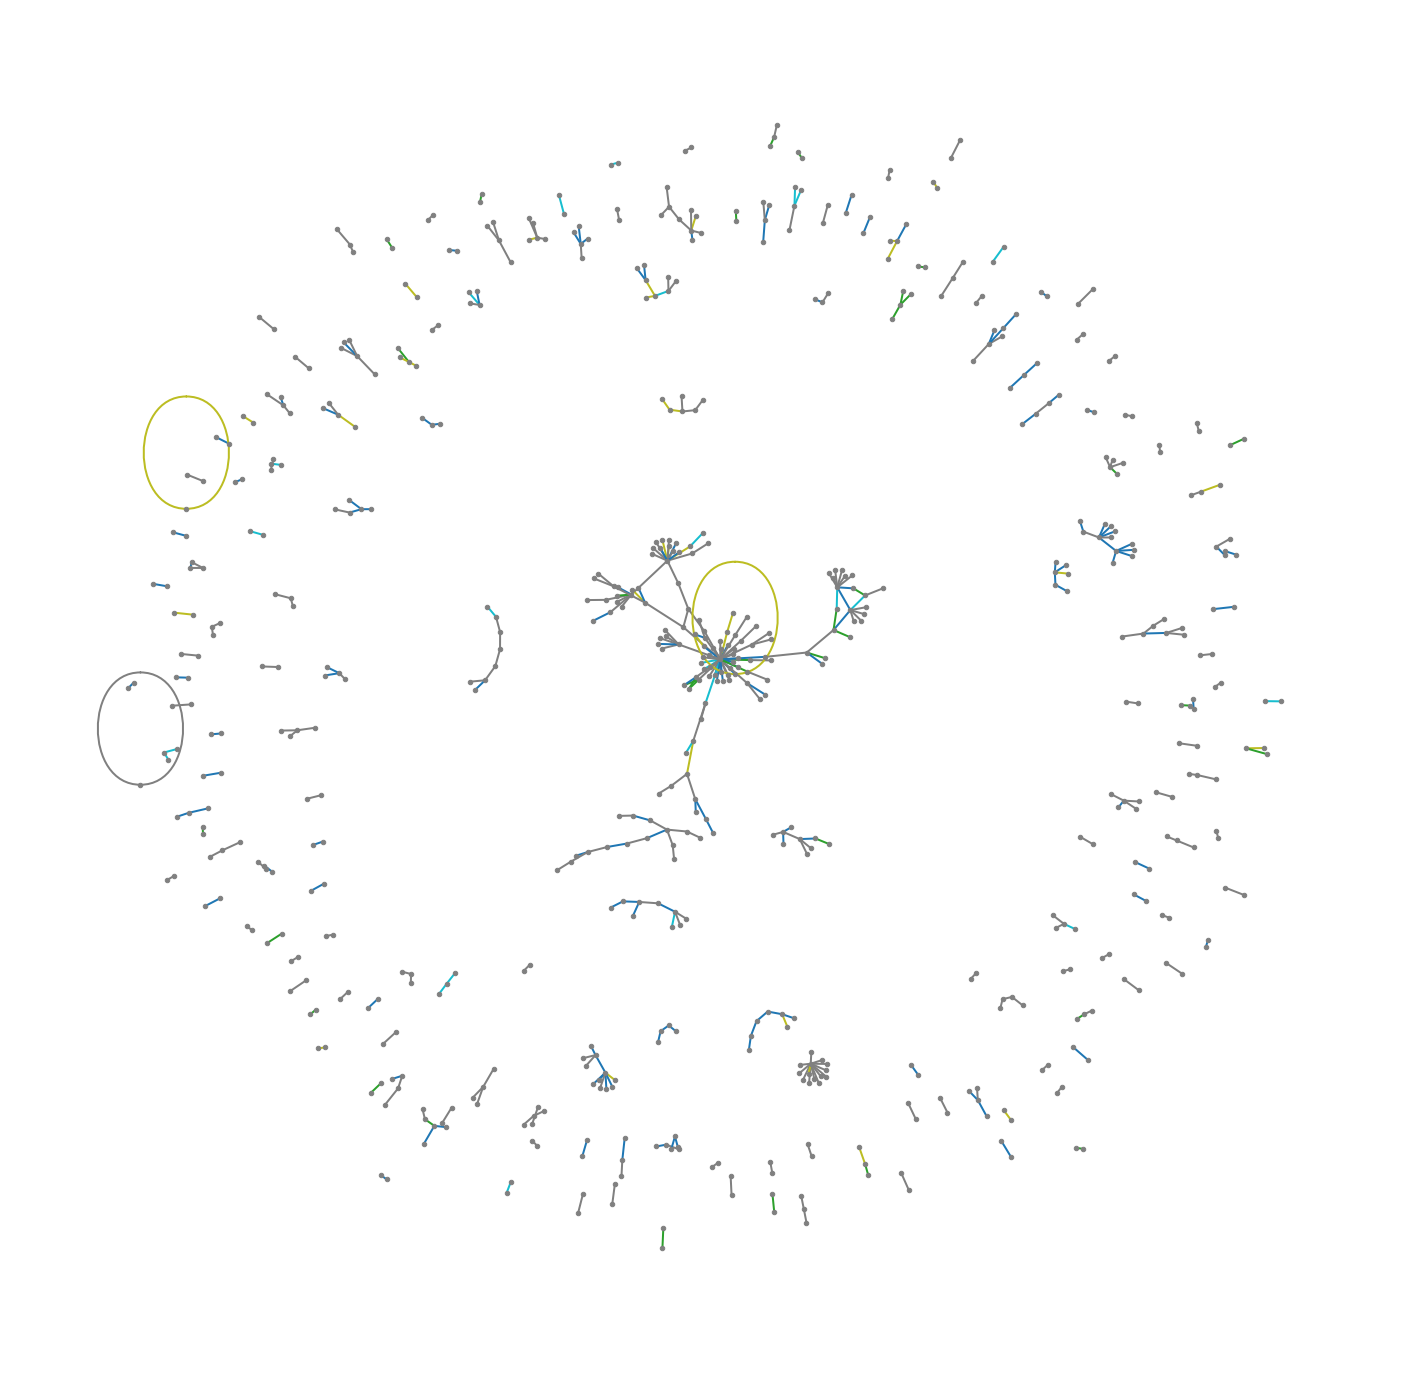

In [13]:
fig, ax = plt.subplots(figsize=(25,25))

G_la_philly = nx.from_pandas_edgelist(df_low_arousal_philly, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_la_philly, seed=7)
nx.draw(G_la_philly, pos, edge_color=df_low_arousal_philly['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

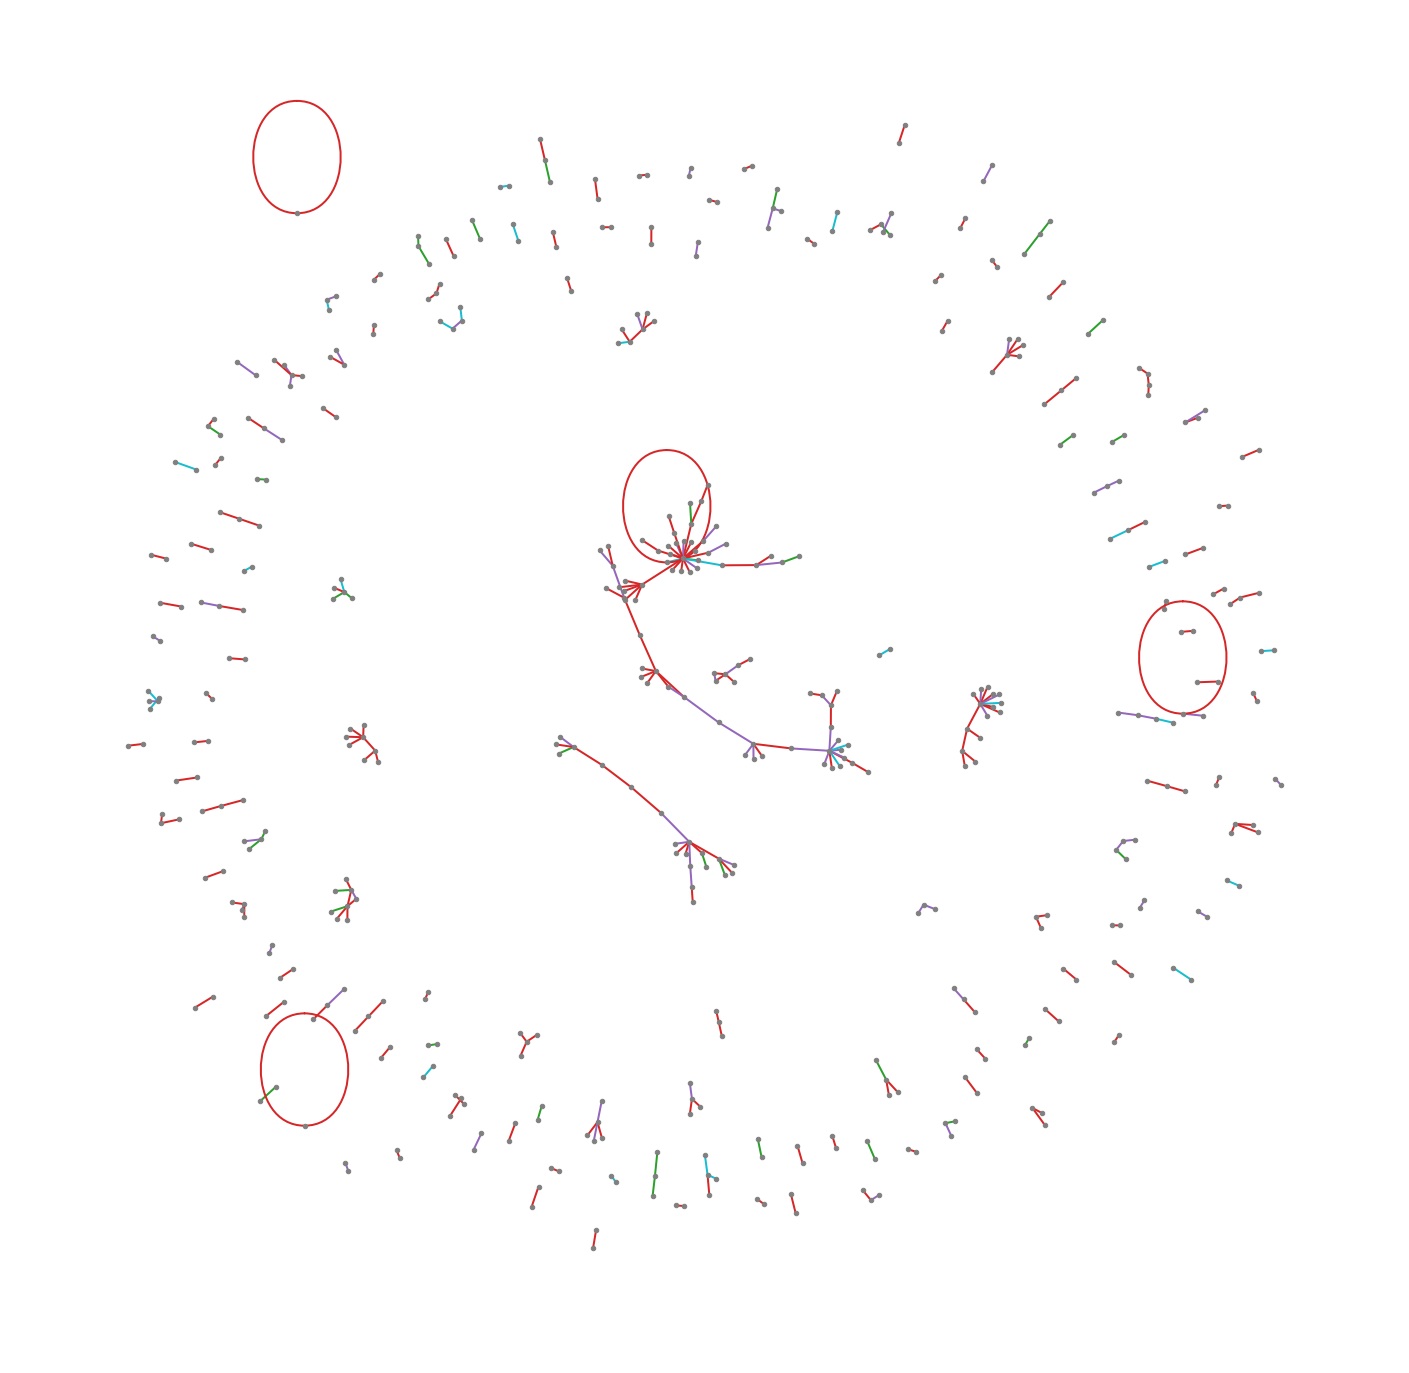

In [14]:
fig, ax = plt.subplots(figsize=(25,25))

G_hm_philly = nx.from_pandas_edgelist(df_high_misery_philly, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_hm_philly, seed=7)
nx.draw(G_hm_philly, pos, edge_color=df_high_misery_philly['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

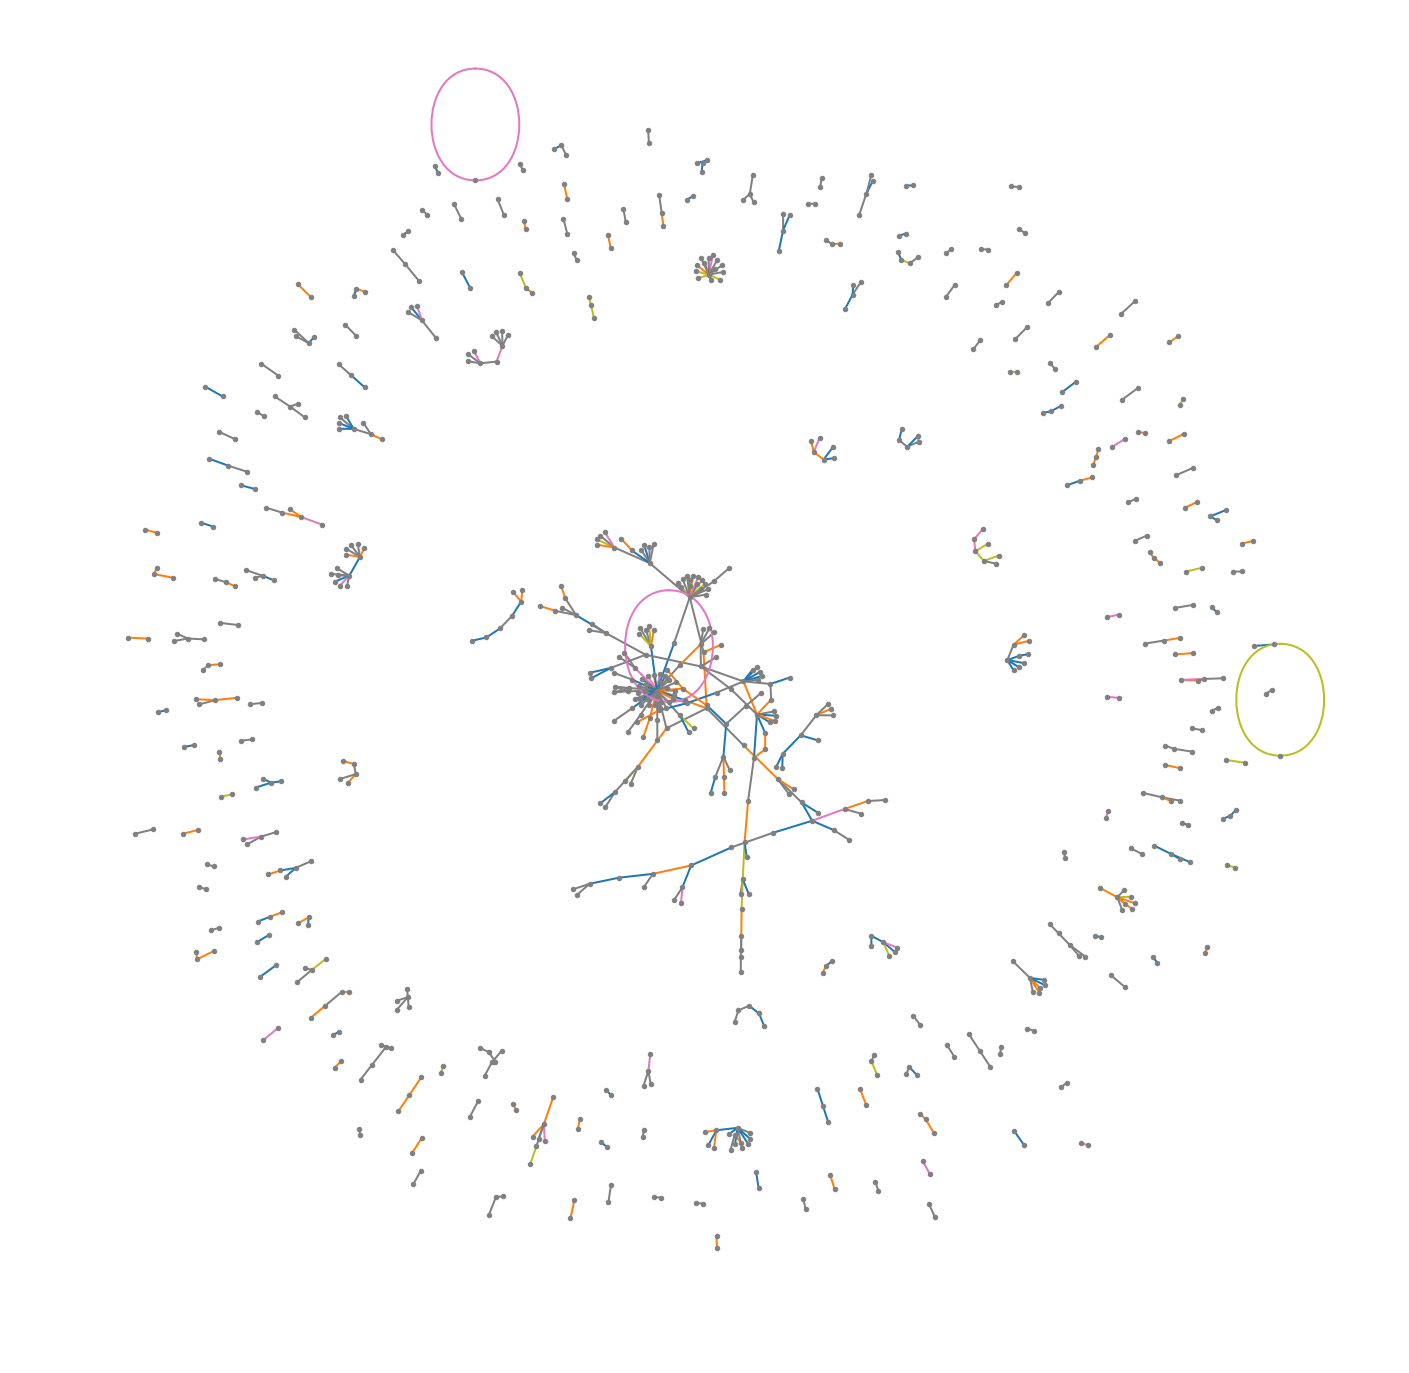

In [15]:
fig, ax = plt.subplots(figsize=(25,25))

G_lm_philly = nx.from_pandas_edgelist(df_low_misery_philly, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_lm_philly, seed=7)
nx.draw(G_lm_philly, pos, edge_color=df_low_misery_philly['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

In [16]:
def generate_triad_graph(input_df, title):
   
    #create df
    df_freq = pd.DataFrame()

    #sort dates
    df_freq['Date'] = input_df['Timestamp'].unique()
    df_freq['Date'] = pd.to_datetime(df_freq['Date'])
    df_freq = df_freq.sort_values(by='Date')
    
    #get dates as list
    df_dates = Counter(input_df['Timestamp'])
    df_dates = list(df_dates.keys())
    df_dates = sorted(df_dates)
    n = len(df_dates)

    #initialize columns
    df_freq['003'] = [0]*n
    df_freq['012'] = [0]*n
    df_freq['102'] = [0]*n
    df_freq['021D'] = [0]*n
    df_freq['021U'] = [0]*n
    df_freq['021C'] = [0]*n
    df_freq['111D'] = [0]*n
    df_freq['111U'] = [0]*n
    df_freq['030T'] = [0]*n
    df_freq['030C'] = [0]*n
    df_freq['201'] = [0]*n
    df_freq['120D'] = [0]*n
    df_freq['120U'] = [0]*n
    df_freq['120C'] = [0]*n
    df_freq['210'] = [0]*n
    df_freq['300'] = [0]*n

    #rewrite zeros with appropriate counts
    i = 0

    day_spec_df = pd.DataFrame() 

    for date in df_dates:
   
        day_spec_df = day_spec_df.append(input_df.loc[input_df['Timestamp'] == date])   

        G = nx.from_pandas_edgelist(day_spec_df, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())
    
        triads = nx.triadic_census(G)
    
        df_freq.iloc[i, 1] = triads['003']
        df_freq.iloc[i, 2] = triads['012']
        df_freq.iloc[i, 3] = triads['102']
        df_freq.iloc[i, 4] = triads['021D']
        df_freq.iloc[i, 5] = triads['021U']
        df_freq.iloc[i, 6] = triads['021C']
        df_freq.iloc[i, 7] = triads['111D']
        df_freq.iloc[i, 8] = triads['111U']
        df_freq.iloc[i, 9] = triads['030T']
        df_freq.iloc[i, 10] = triads['030C']
        df_freq.iloc[i, 11] = triads['201']
        df_freq.iloc[i, 12] = triads['120D']
        df_freq.iloc[i, 13] = triads['120U']
        df_freq.iloc[i, 14] = triads['120C']
        df_freq.iloc[i, 15] = triads['201']
        df_freq.iloc[i, 16] = triads['300']

        i = i+1 
    
    #as percent of total triads - where at least 2 edges are present (so ignore first 2 columns)

    df_freq_norm = df_freq.copy()
    df_freq_norm = df_freq_norm.drop(['003', '012'], axis=1)

    df_freq_norm['SUM'] = df_freq_norm.sum(axis=1, numeric_only=True)
    df_freq_norm[['102', '021D', '021U', '021C', '111D', '111U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300']] = df_freq_norm[['102', '021D', '021U', '021C', '111D', '111U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300']].div(df_freq_norm['SUM'], axis=0)

    #plot counts + freqs
    fig, axs = plt.subplots(1,2, figsize=[14,6]) 

    #count
    df_freq.plot( x = 'Date' , y = '102', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '021D', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '021U', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '021C', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '111D', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '111U', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '030T', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '030C', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '201', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '120D', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '120U', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '120C', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '210', ax = axs[0]) 
    df_freq.plot( x = 'Date' , y = '300', ax = axs[0]) 

    axs[0].get_legend().remove()

    #freq
    df_freq_norm.plot( x = 'Date' , y = '102', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '021D', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '021U', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '021C', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '111D', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '111U', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '030T', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '030C', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '201', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '120D', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '120U', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '120C', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '210', ax = axs[1]) 
    df_freq_norm.plot( x = 'Date' , y = '300', ax = axs[1]) 

    #box = axs[1].get_position()
    #axs[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])

    #axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    for ax in axs:
        ax.set_xlabel('')
    axs[0].set_ylabel('Count', fontsize = 15)
    axs[1].set_ylabel('Frequency', fontsize = 15)
    fig.suptitle(title, fontsize = 20)
    #'Philadelphia Superbowl Triad Census (for at least 2 edges)'
    
    plt.savefig(title + '.png')
    df_freq.to_csv(title + 'freq_data.csv')

In [17]:
from collections import Counter

In [18]:
def hla_triads(input_df, title):
    df_high = input_df.loc[(input_df['Emotion'] == 'Anger') | (input_df['Emotion'] == 'Anticipation') | (input_df['Emotion'] == 'Fear') | (input_df['Emotion'] == 'Surprise')]
    df_low = input_df.loc[(input_df['Emotion'] == 'Sadness') | (input_df['Emotion'] == 'Trust') | (input_df['Emotion'] == 'Joy') | (input_df['Emotion'] == 'Disgust') | (input_df['Emotion'] == 'neutral')]
    title_high = 'High Arousal ' + title 
    title_low = 'Low Arousal ' + title
    generate_triad_graph(df_high, title_high) 
    generate_triad_graph(df_low, title_low)

In [19]:
def hlm_triads(input_df, title):
    df_high = input_df.loc[(input_df['Emotion'] == 'Anger') | (input_df['Emotion'] == 'Fear') | (input_df['Emotion'] == 'Sadness') | (input_df['Emotion'] == 'Disgust')]
    df_low = input_df.loc[(input_df['Emotion'] == 'Trust') | (input_df['Emotion'] == 'Joy') | (input_df['Emotion'] == 'Anticipation') | (input_df['Emotion'] == 'Surprise') | (input_df['Emotion'] == 'neutral')]
    title_high = 'High Misery ' + title 
    title_low = 'Low Misery ' + title
    generate_triad_graph(df_high, title_high) 
    generate_triad_graph(df_low, title_low)

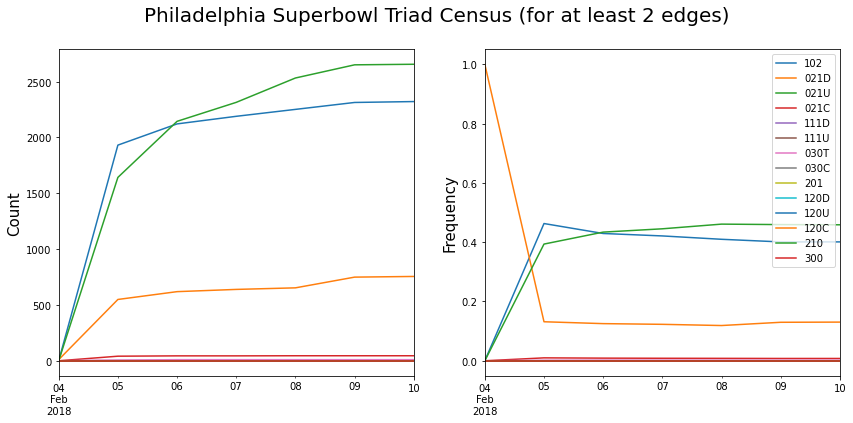

In [20]:
generate_triad_graph(riot_philadelphia_superbowl_df, 'Philadelphia Super Bowl Triad Census (for at least 2 edges)')

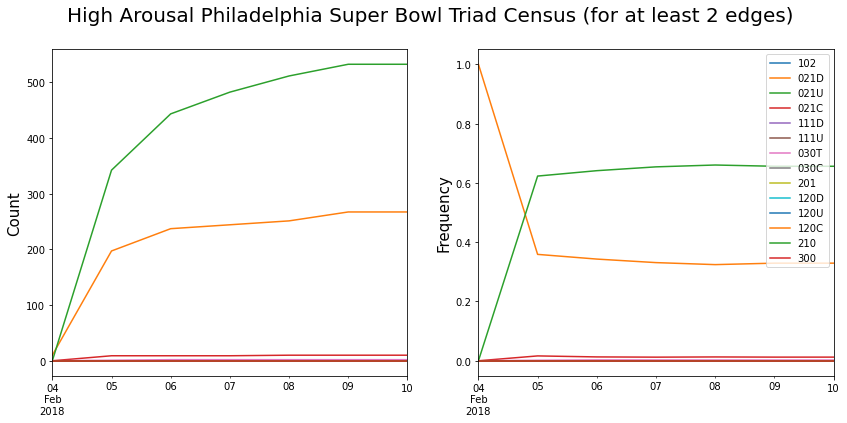

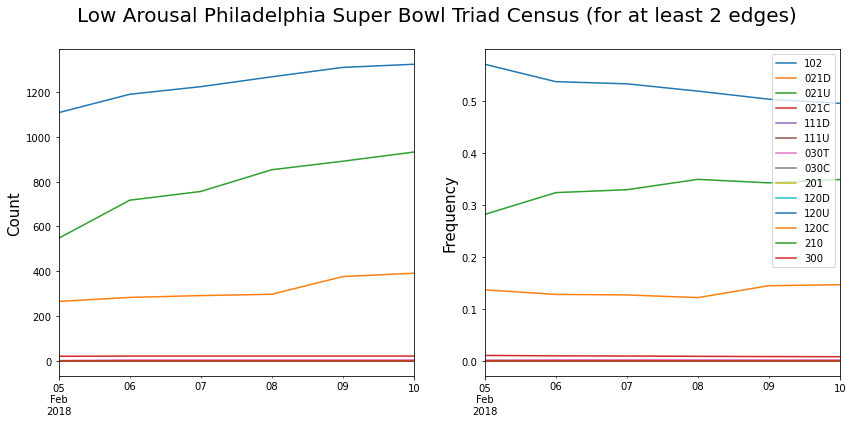

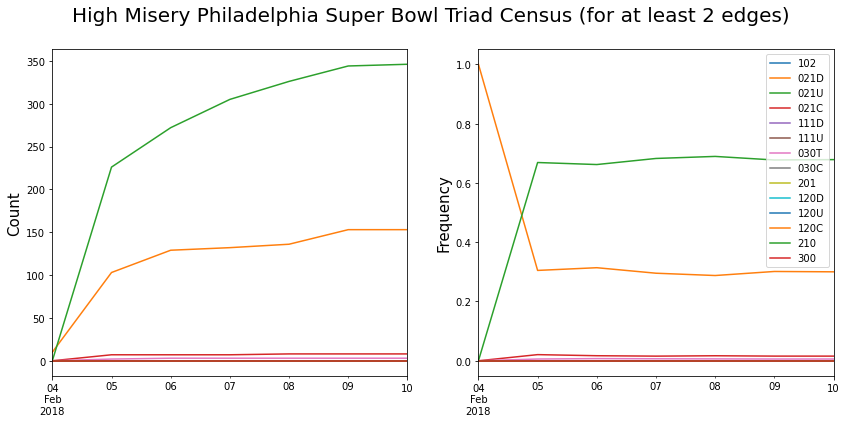

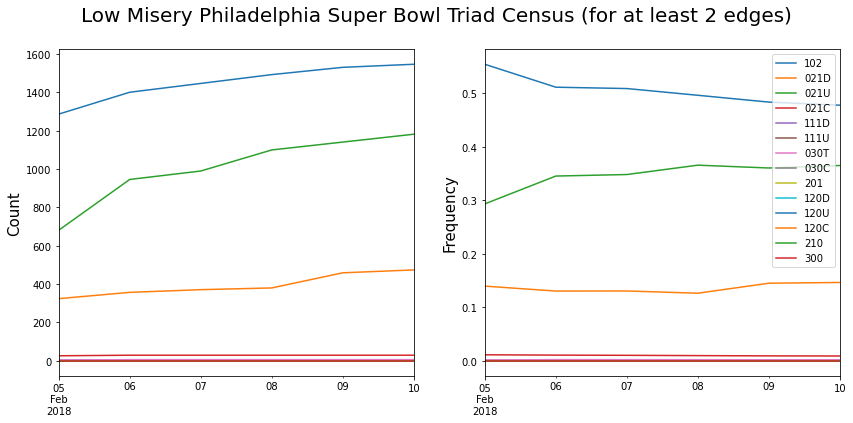

In [21]:
hla_triads(riot_philadelphia_superbowl_df, 'Philadelphia Super Bowl Triad Census (for at least 2 edges)')
hlm_triads(riot_philadelphia_superbowl_df, 'Philadelphia Super Bowl Triad Census (for at least 2 edges)')

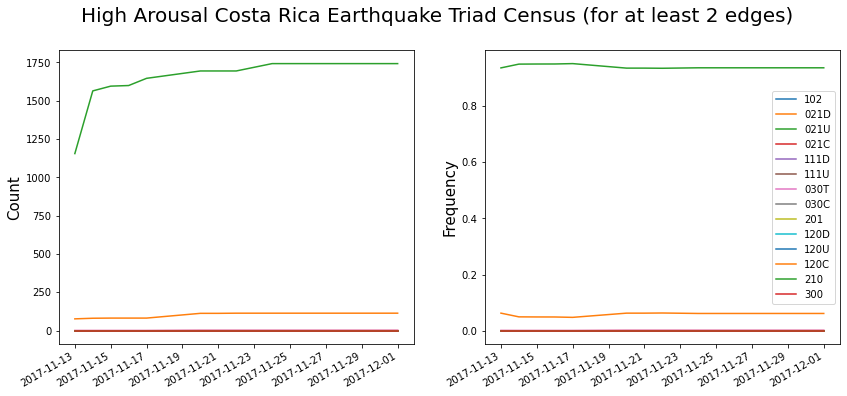

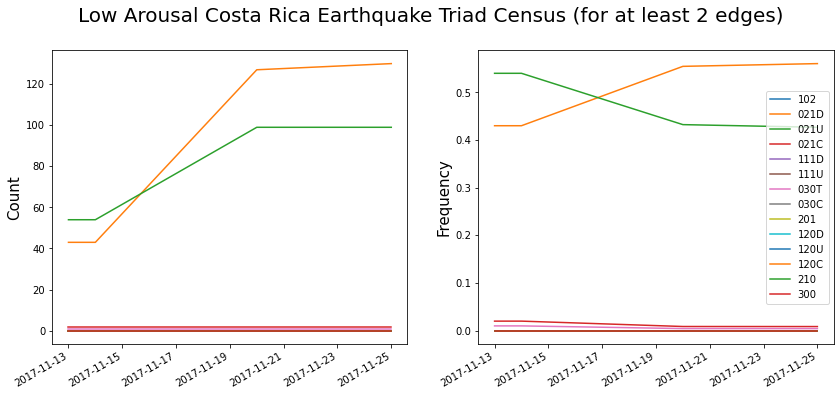

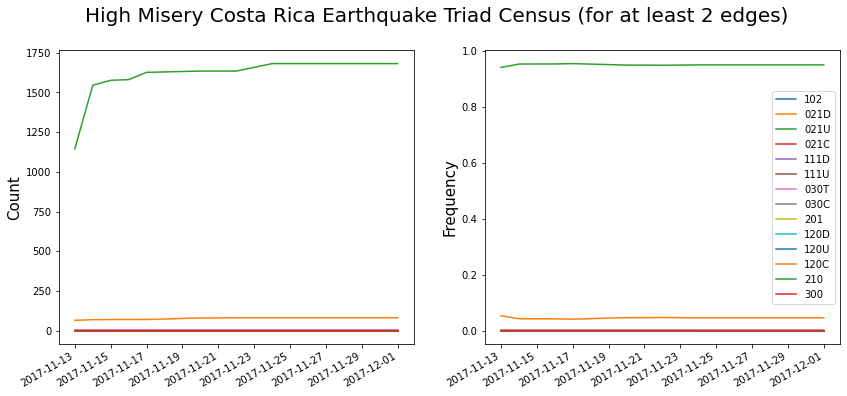

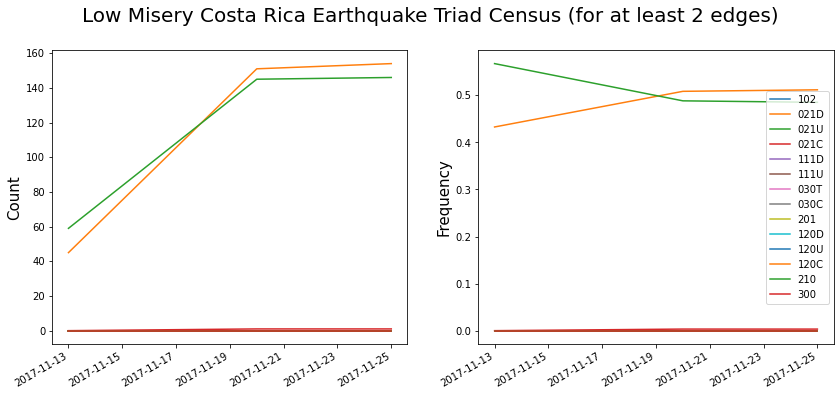

In [22]:
hla_triads(earthquake_costarica_df, 'Costa Rica Earthquake Triad Census (for at least 2 edges)')
hlm_triads(earthquake_costarica_df, 'Costa Rica Earthquake Triad Census (for at least 2 edges)')

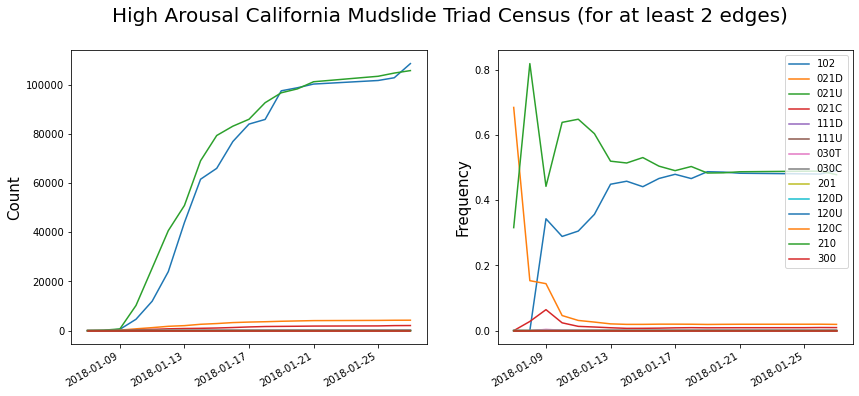

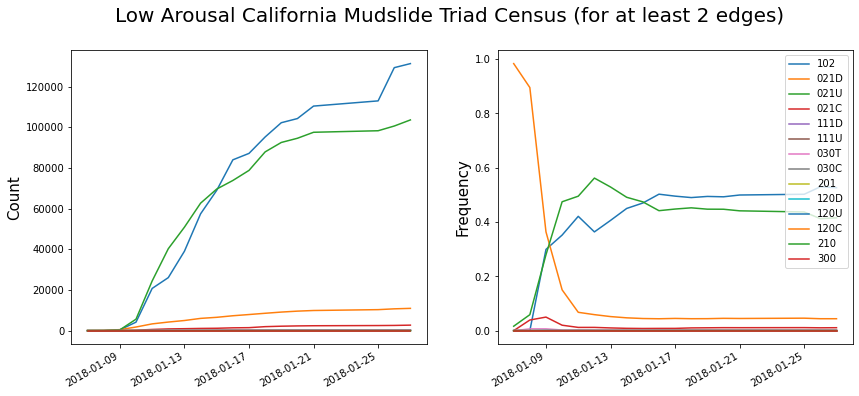

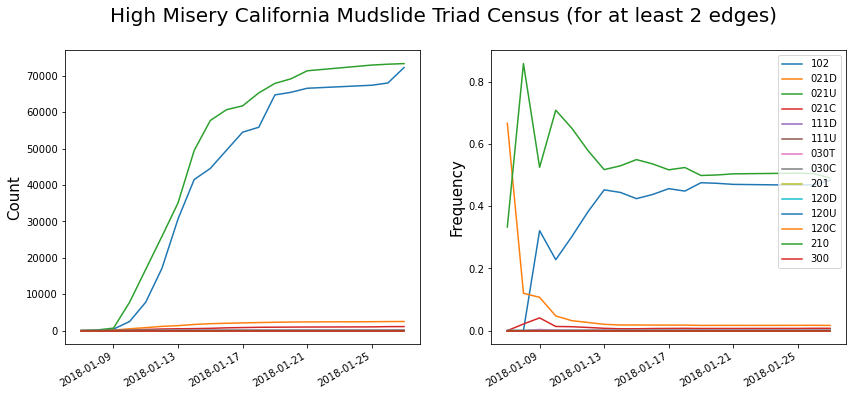

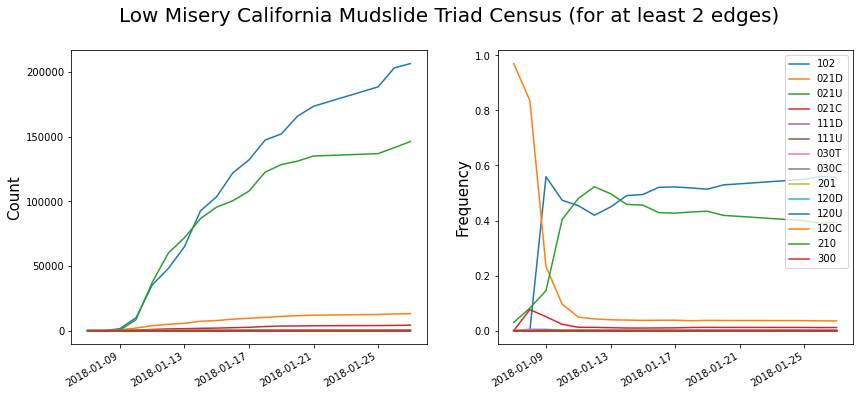

In [23]:
hla_triads(mudslide_california_df, 'California Mudslide Triad Census (for at least 2 edges)')
hlm_triads(mudslide_california_df, 'California Mudslide Triad Census (for at least 2 edges)')

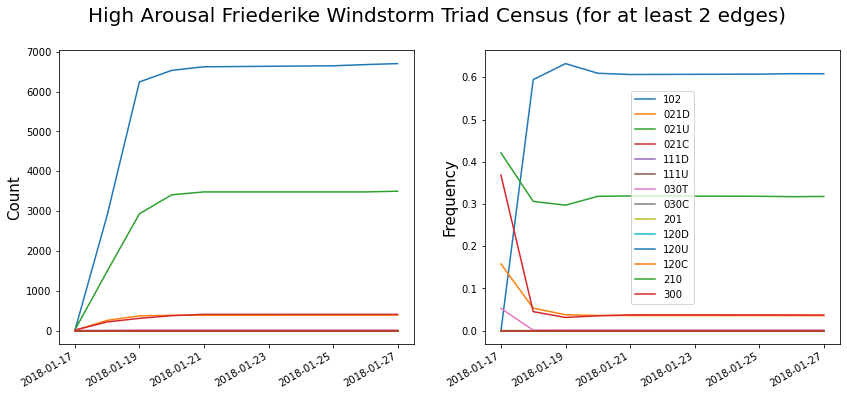

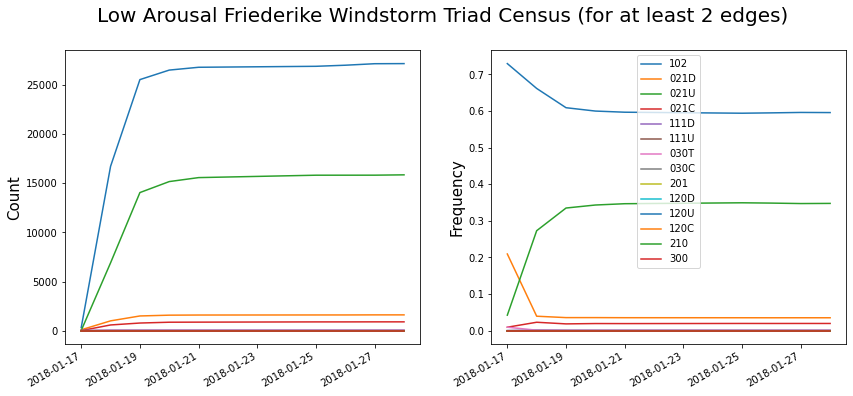

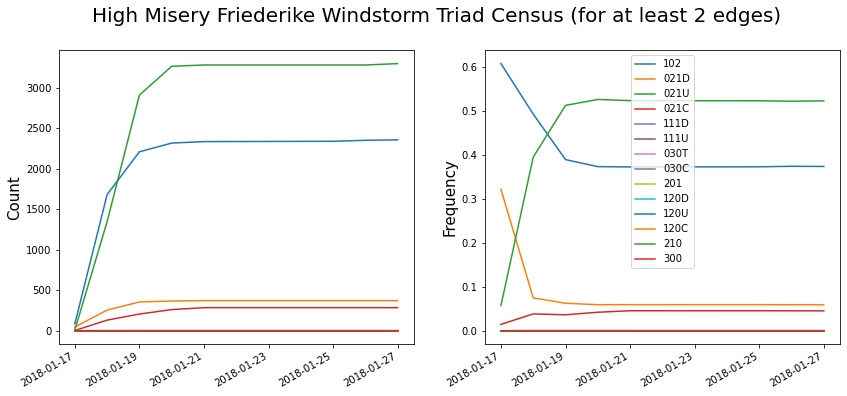

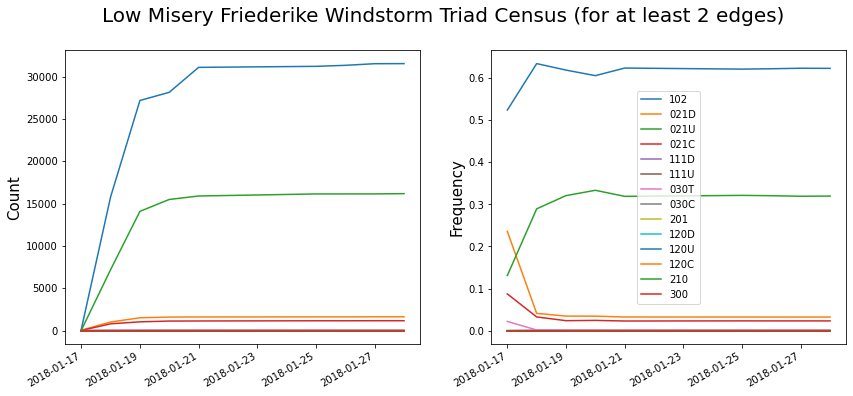

In [24]:
hla_triads(windstorm_friederike_df, 'Friederike Windstorm Triad Census (for at least 2 edges)')
hlm_triads(windstorm_friederike_df, 'Friederike Windstorm Triad Census (for at least 2 edges)')

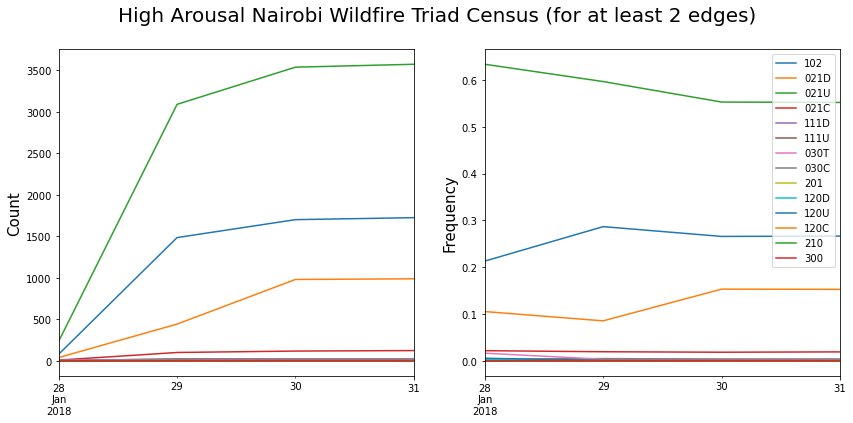

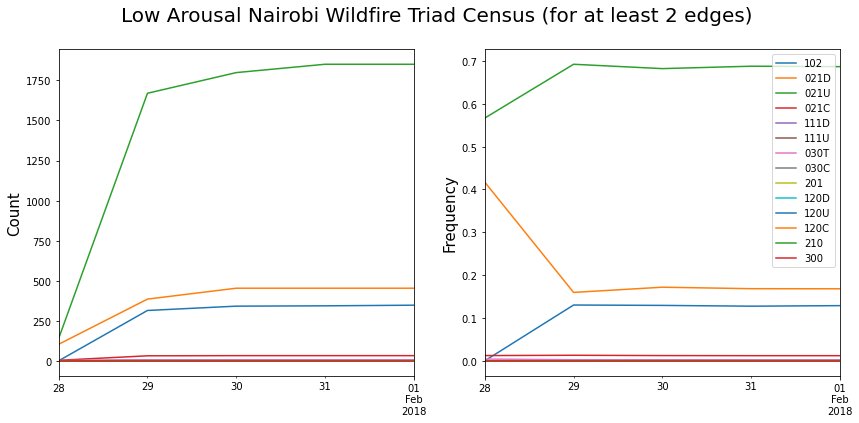

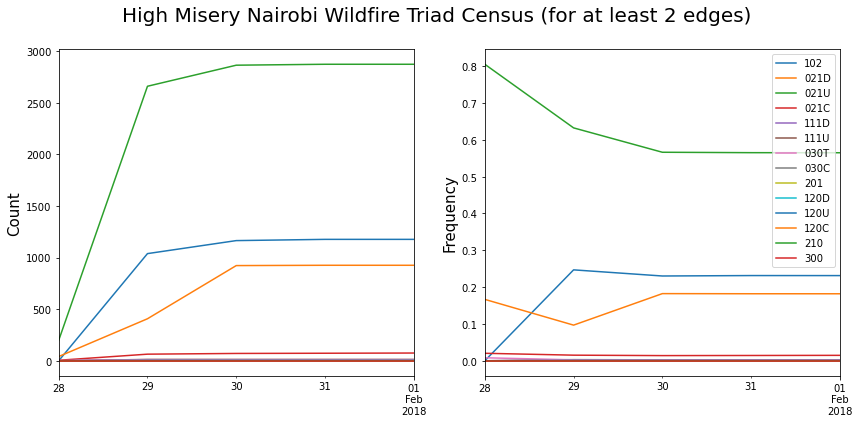

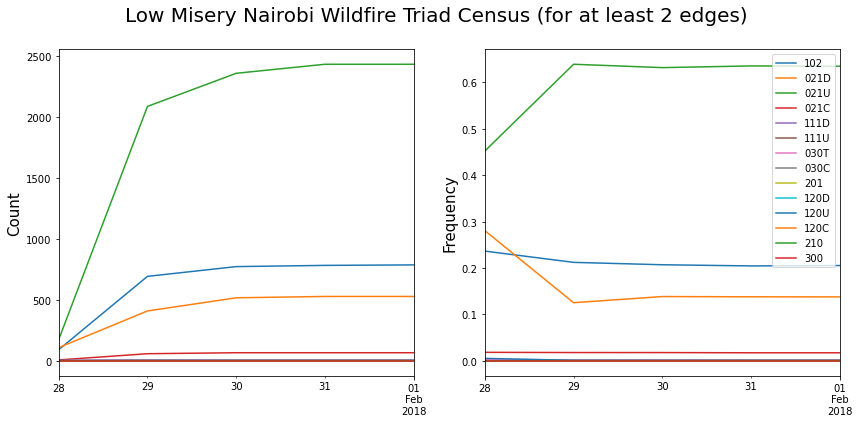

In [25]:
hla_triads(wildfire_nairobi_df, 'Nairobi Wildfire Triad Census (for at least 2 edges)')
hlm_triads(wildfire_nairobi_df, 'Nairobi Wildfire Triad Census (for at least 2 edges)')

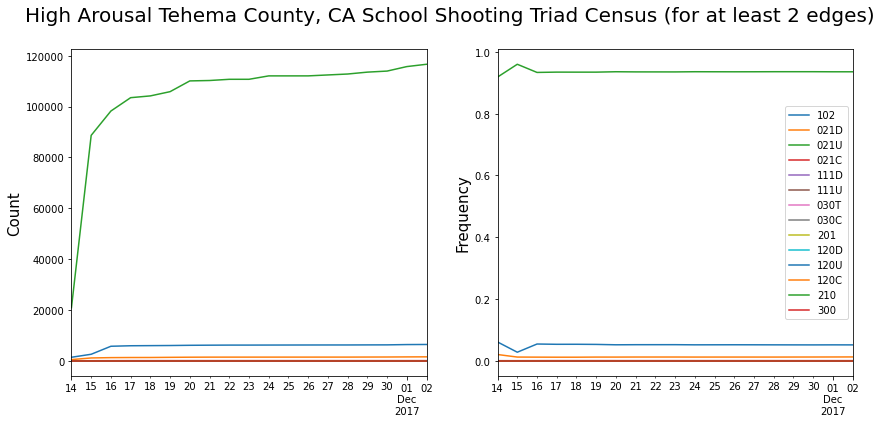

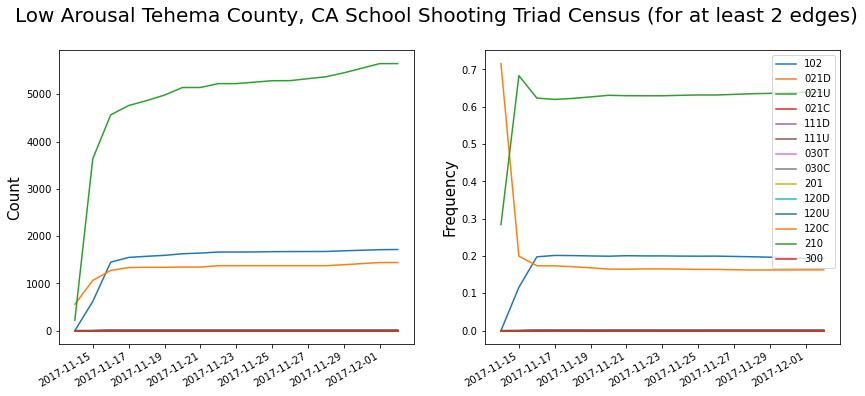

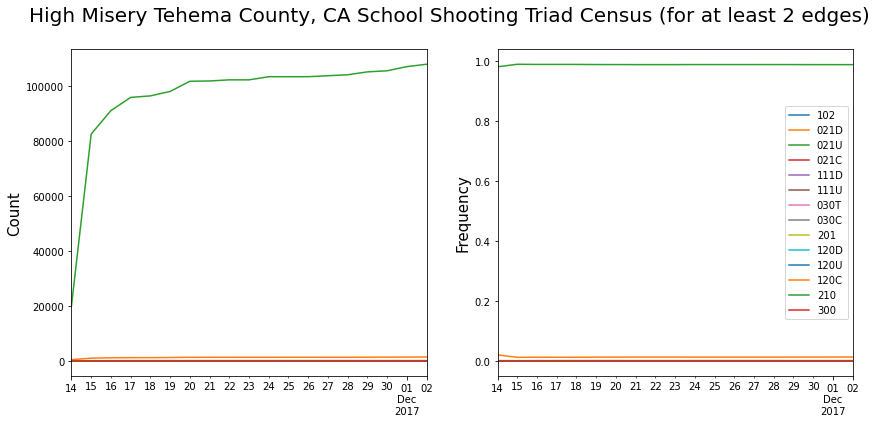

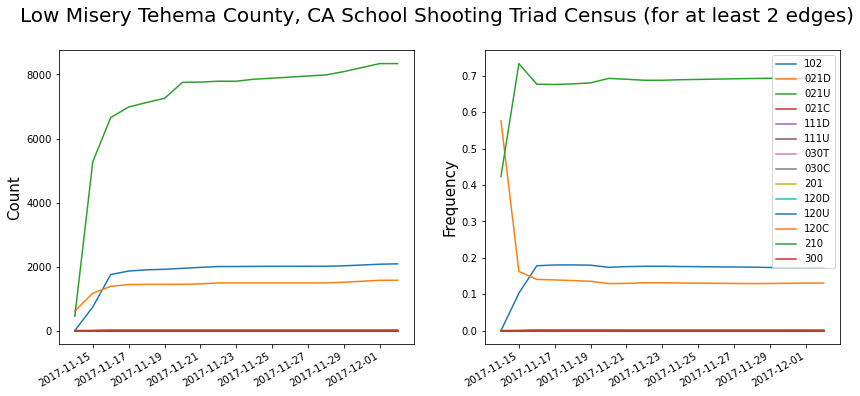

In [26]:
hla_triads(school_shooting_tehama_county_df, 'Tehema County, CA School Shooting Triad Census (for at least 2 edges)')
hlm_triads(school_shooting_tehama_county_df, 'Tehema County, CA School Shooting Triad Census (for at least 2 edges)')

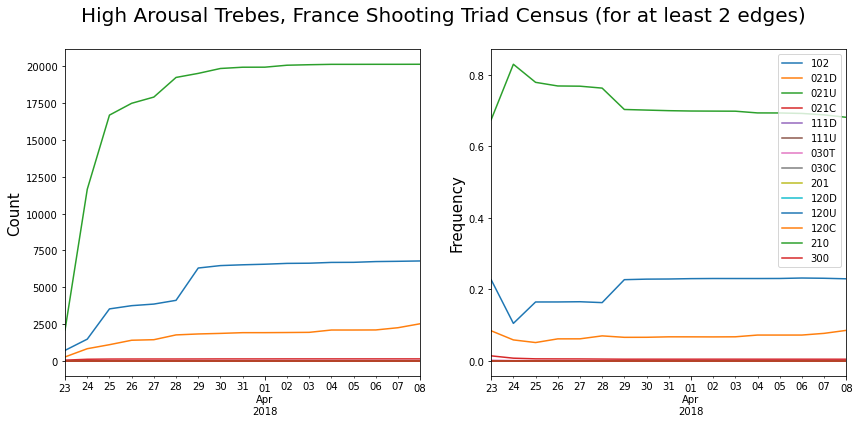

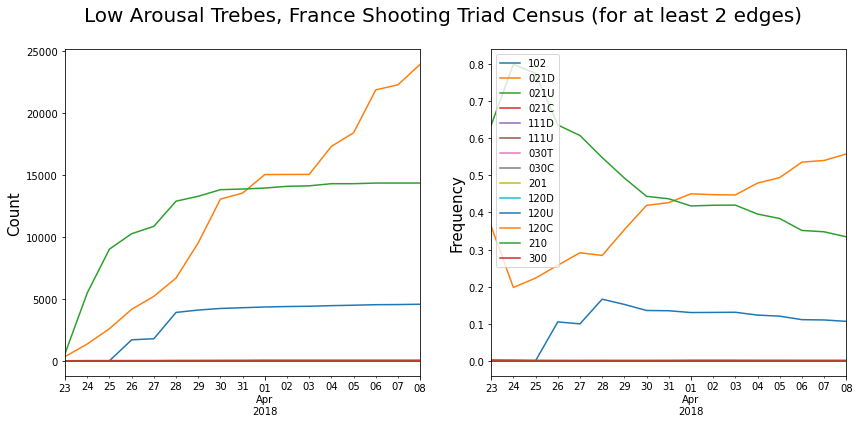

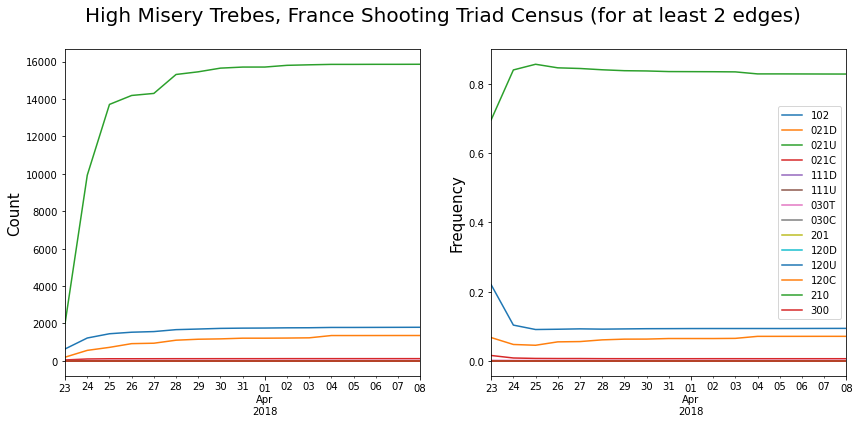

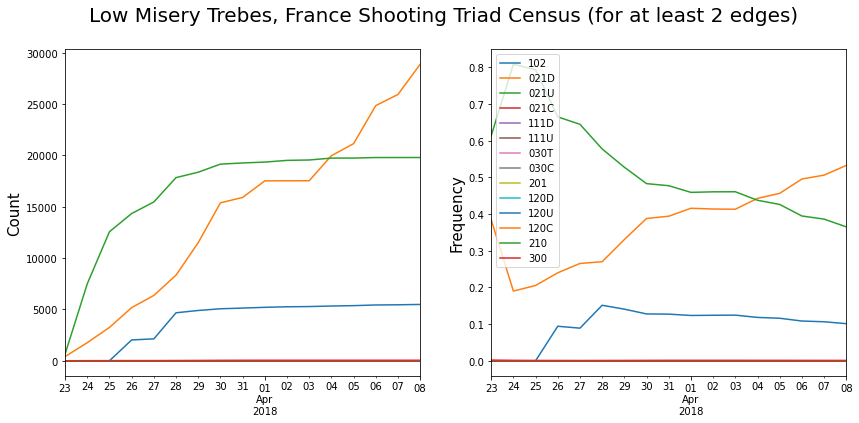

In [27]:
hla_triads(shooting_trebes_france_df, 'Trebes, France Shooting Triad Census (for at least 2 edges)')
hlm_triads(shooting_trebes_france_df, 'Trebes, France Shooting Triad Census (for at least 2 edges)')

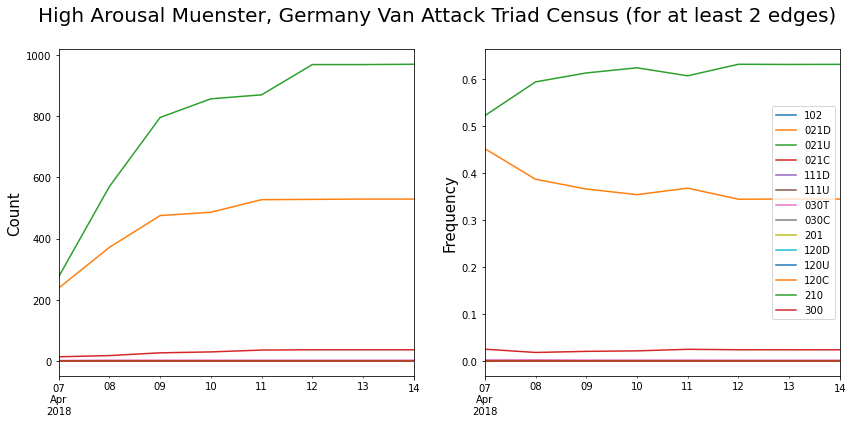

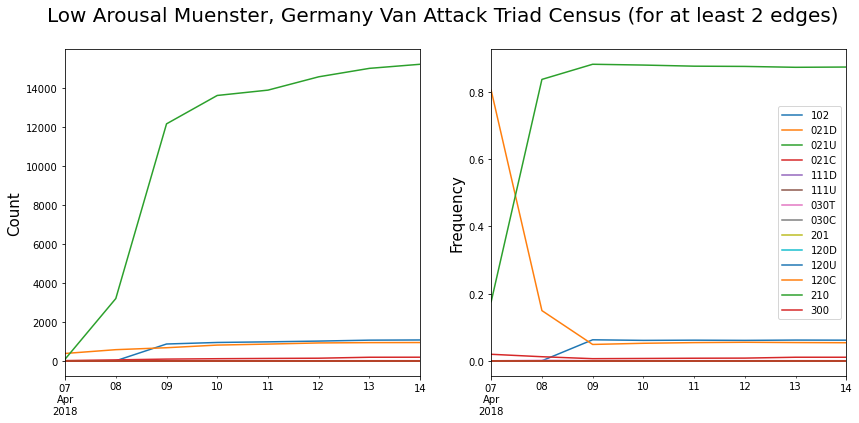

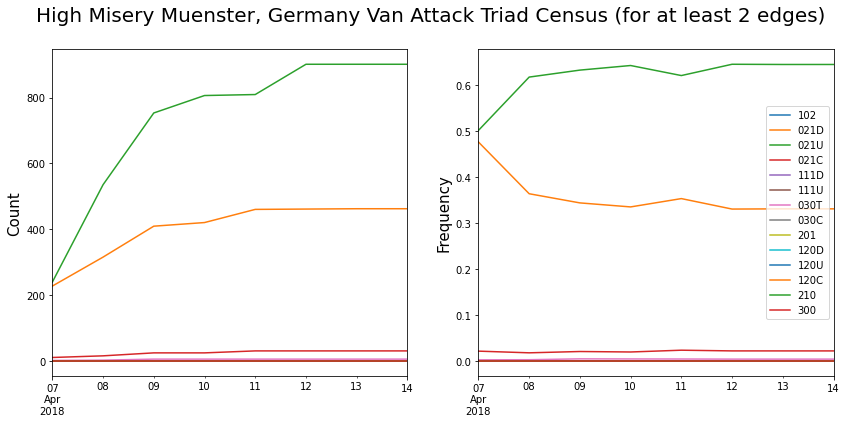

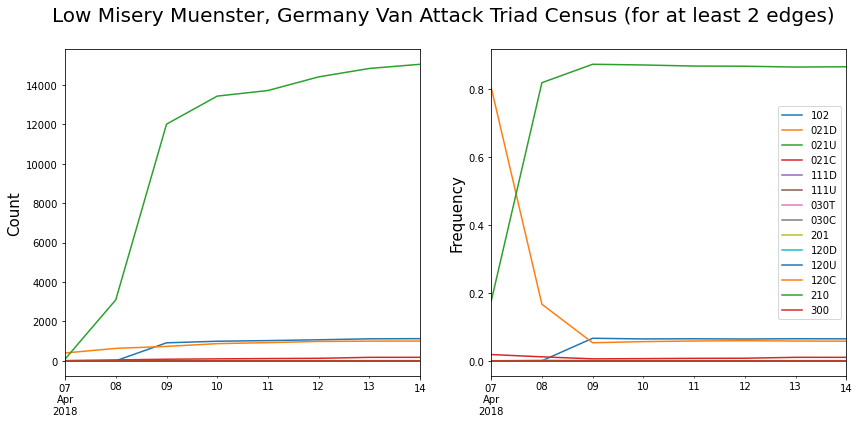

In [28]:
hla_triads(van_attack_muenster_df, 'Muenster, Germany Van Attack Triad Census (for at least 2 edges)')
hlm_triads(van_attack_muenster_df, 'Muenster, Germany Van Attack Triad Census (for at least 2 edges)')